### The problem Statement

The data is about the amount spent on advertising through different channels like TV, Radio and newspaper. The goal is to pridict how the expense on each channel affect the sales and is there a way to optimise that sale? 

In [1]:
#Necessary Imports 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()  # printing the summery of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum() # finding the count of missing value from different column

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

#### Now, let's showcase the relationship between the features and the target column

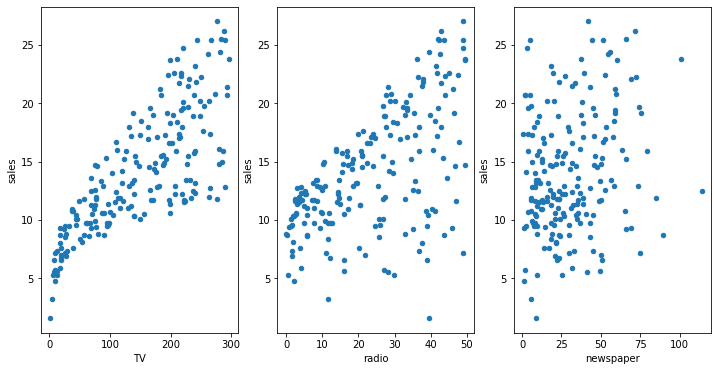

In [7]:
#visualize the relationship b/w the features and he response using scatter plots
fig, axs = plt.subplots(1,3)

data.plot(kind='scatter', x='TV', y='sales', ax= axs[0], figsize=(12,6))
data.plot(kind='scatter', x='radio', y='sales', ax= axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax= axs[2])
fig.savefig('testdata.jpg')

### Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sale?

These general questions might lead you to more specific questions:

1- What's are reletionship between ads and sales?

2- How prominent is that relationship?

3- which ad types contribute to sales?

4- How each ad contribute to sales?

5- Can sales be predicted based on the expense of the advertisement

we will explore these questions below!

from the reletionship diagram above, it can be observed that there seems to be a linear relationship b/w the features TV ad, Radio and the sales is almost a linear one. 

### Simple Linear Regression 

https:/www.desmos.com/calculator/2rnggoa6a4

Simple Linear Regression means we take only one feature and one label

Simple Linear Regression is a method for predicting a quantitative response using a single featute. the mathematical equation is- y = mx + c

m = slpoe/coefficient,   c = intercept,    x= feature

In [8]:
# Create x = feature and y = label
x= data[['TV']]
y= data.sales

# Follow the usualsklearn pattern: import, instantiate, fit

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x, y)

LinearRegression()

In [9]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


Now we have m= 0.04753664 and c= 7.0325935491276965 for finding the pridicted data i.e y = mx + c

### prediction using the model


In [10]:
# calculate the prediction
7.032594 + 0.047537*50    # suppose here we invest 50 Thousand for TV advertisement  

9.409444

Thus, we would predict Sales of 9.409 widgets in the market

Let's do the same with the code 

In [11]:
# use the model to make predictions on a new value
lm.predict([[50]])

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

### How least square line changes based on input data (Just for demo purpose)

https://www.desmos.com/calculator/jwquvmikhr

### Model Cofidence
<b> One of the most generic way to evaluate the fit of a linear modal is by computing the R-squared value. R-squared explains the proportion of variance

#### Metric to check model performence(r2 score)

    R2 = TSS-RSS/TSS
    
       = 1 - RSS/TSS
    
    where = RSS  is the Residual Sum Of Square   TSS is total sum of square 

In [12]:
from sklearn.metrics import r2_score

In [13]:
# pass all TV record and predict sales
predicted_sales = lm.predict(x)

In [10]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [15]:
 #let's compare original sales numbers with our model predicted sales
r2_score(y_true = y, y_pred =predicted_sales)

0.611875050850071

### When we use simple linear regression (means use only single feature) then we use R2 score to evaluate the model

When we use more than one featute i.e we use Multiple Linear Regression model then to evaluate the model Adjusted R2 has to come into the picture

## Adjusted R2 Statistics

We calculate Adjusted R2 -

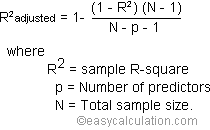

### Multiple Linear regression

In [16]:
# Create X for features and y =label
x= data[['TV','radio','newspaper']]
y= data.sales

lm = LinearRegression()
lm.fit(x,y)

print('Intercept: ->',lm.intercept_)
print('TV :       ->',lm.coef_[0])
print('Radio :    ->',lm.coef_[1])
print('Newspaper :->',lm.coef_[2])

Intercept: -> 2.938889369459405
TV :       -> 0.04576464545539758
Radio :    -> 0.1885300169182047
Newspaper :-> -0.0010374930424762452


How do we interpret these coefficient? If we look at the coefficient, the coefficient for the newspaper spends is negative. it means that the money spent for newspaper advertisements is not contributing in a positive way to the sales

### Feature Selection

How I decide Which features have to be included in a liear model? Here's one idea.

- Check if the R2 squared value goes up when you add new predictors to the model

In [17]:
# preparing data for R2_Score on the TV and adio as we see they are positively related (Co-efficient)
# Create X for features and y =label
x= data[['TV','radio']]
y= data.sales

#Let's  feed features and label and train the model
lm.fit(x,y)

#Check the r2_score
Predicted_Sales = lm.predict(x)
r2_score(y,Predicted_Sales)

0.8971942610828957

In [18]:
#let's do the same with all the features
x= data[['TV','radio','newspaper']]
y= data.sales

#Let's  feed features and label and train the model
lm.fit(x,y)

#Check the r2_score
Predicted_Sales = lm.predict(x)
r2_score(y,Predicted_Sales)

0.8972106381789522

Selecting the modal with the highest value of R2 is not a correct approch as the value of r2 shall always increase whenever a new feature is takenfor consideration even if the feature is unreleted to the response.

The alternative is to use the <b> Adjusted R2 </b> which panalized the model complexity(to control overfiting ). But this again generally under panalized coplexity.

A better approch to feature selection is <b> Cross validation </b>. It provide a more relible way to choose which of the craeted modals will best<b> generalise </b> as it better estimates of out-of-sample error. An advantage of Cross validation method can be applied any machine learning modal and the scikit-learn package provides extensive functionality for that.

# Project 1 of Linear__Regression

## Problem Statement

### We need to predict the chance of admission of students based on the different student score

#### Feature or independent variables
- GRE Score
- Toefel Score
- University Rating
-SOP
-LOR
-CGPA
-Research
#### Label/Target
-Chance of Admission

### Always refer sklearn official documentation if you not sure about syntax or parameter 

https:/scikit-learn.org 

In [1]:
#Lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file and convert into Dataframe
df=pd.read_csv('Admission_Prediction.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
df. shape

(500, 9)

In [6]:
# Understanding data at high level. Check the statistics of data set
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Fill the Nan Value
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

df['GRE Score'] =df['GRE Score'].fillna(df['GRE Score'].mean())

df['TOEFL Score'] =df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [9]:
# Verify if Nan's are filled
df. describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first coloumn just serial number, So we don't need this column . so we drop it.

In [10]:
df= df.drop(columns = ['Serial No.'])

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's Visulize the data and alalyze the relationship between independent and dependent variable

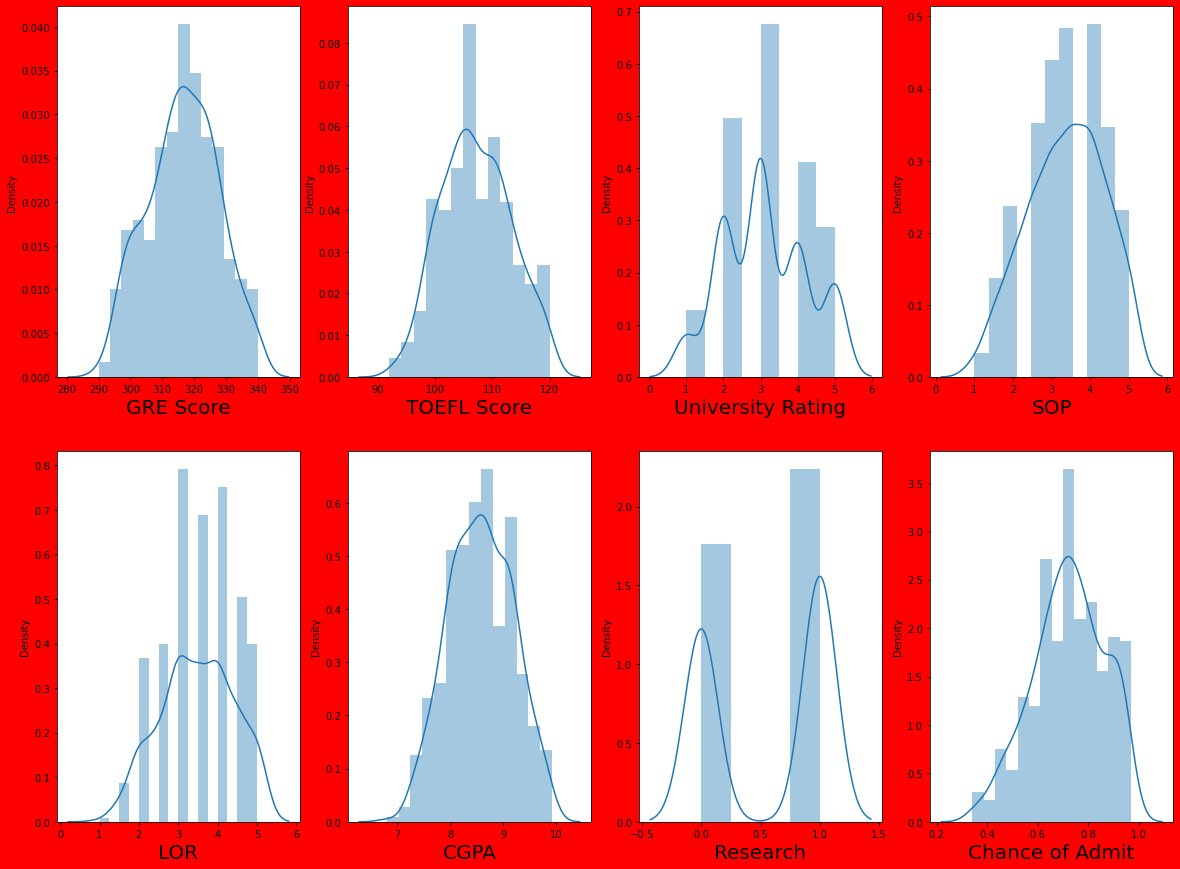

In [12]:
# Let's see how data is ditributed for every column\
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() # we can also write it as  ->  plt.tight_layout()

The data distribution looks decent enough and there does'nt seem to be any skewness. Graet let's gp ahead!

Lets observ the relationship between the independent variable and dependend variable.

In [13]:
# Divide the set into feature and lebel
y = df['Chance of Admit']
x = df.drop(columns = ['Chance of Admit'])

In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [15]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


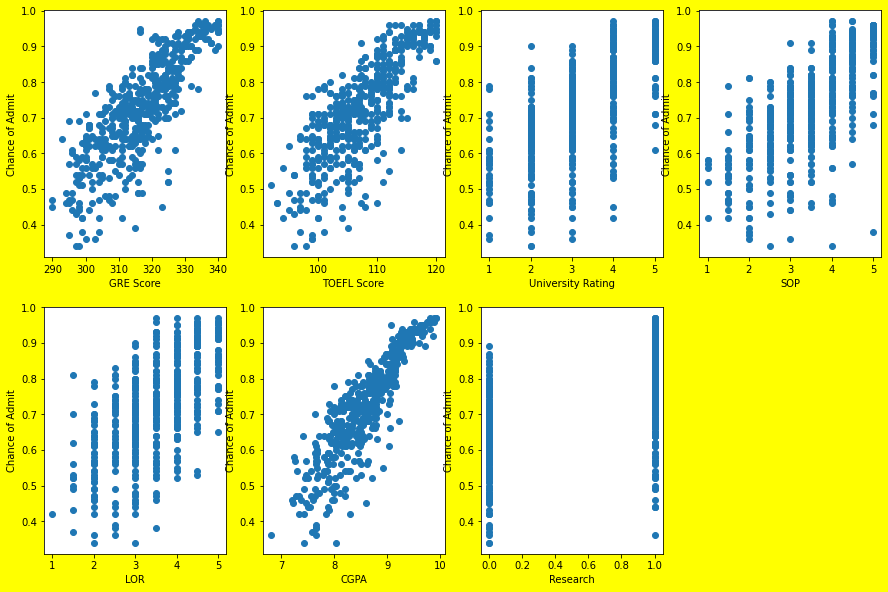

In [17]:
# Let's see relatonship between column lebal and features
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit', fontsize =10)
        
    plotnumber+=1
plt.show() # we can also write it as  ->  plt.tight_layout()

Great, The relationship between the dependent and independent variables look fairly linear. Thus our linearity assumption is satisfied 

In [18]:
# Date scaling, Formula Z = (X -mean)/std

scaler =StandardScaler()

X_scaled =scaler.fit_transform (x)

In [19]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

Let's go ahead and use linear regression and see how good it fits our data. But first.let's split our data in train and test.

In [20]:
# Split data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=348)
y_train.head

<bound method NDFrame.head of 459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
       ... 
91     0.38
213    0.96
157    0.65
264    0.75
83     0.92
Name: Chance of Admit, Length: 375, dtype: float64>

### Model instantating and training

In [21]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

### Predict the chance of admisson given feeatures

In [22]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [23]:
#Since we have already fit the scaler, you can transform the data
print ( 'Chance of Admisson is : ',regression.predict(scaler.transform([[327.0, 113.0, 4.0, 4.5, 4.5, 9.04, 0]])))

Chance of Admisson is :  [0.82445851]


### You can save the model and later you can use it for prediction

In [34]:
# saving the model to the Local file system

pickle.dump(regression, open('reg_model','wb'))

In [38]:
# prediction using the saving model
loaded_model = pickle.load(open('reg_model', 'rb'))

a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))

a

array([0.63715829])

In [25]:
#Let's try in new window with only pickel model
scaler.transform([[314,103,2,2,3,8.21,0]])

array([[-0.23066792, -0.69273097, -0.99125473, -1.3878618 , -0.52351283,
        -0.6064802 , -1.12815215]])

### Let's check how well model fits on train data

In [26]:
regression.score(x_train,y_train)

0.82855357382842

### let's plot and visuallze

In [27]:
y_pred =regression.predict(x_test)

In [28]:
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admisson')
plt.ylabel('Predict chance of admission')
plt.title('Actual vs model predicted')
plt.show()

### Model Evaluation

- <b>Mean absolute error (MAE):- </b> Represent average error
- <b>Mean squred error (MSE):-  </b>Similar to MAE but noise is exaggerated and larger error are "Punished". It is harder to interprtete than MAE as it's not in base units, however, it is generally more popular.
- <b>Root mean squared error (RMSE)- </b>Most popular metric, similar to MSE, however, the result is square rootedto make it more interpretableas it's in base unit. It is recommended that RSME be used as the primarymetric to interpret the model    

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
y_pred = regression.predict(x_test)

In [31]:
# MAE
mean_absolute_error(y_test,y_pred)

0.04421359936541998

In [32]:
# MSE
mean_squared_error(y_test,y_pred)

0.004309172332351597

In [33]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485888

### You have successfully completed building Linear Regression Model 

Now let's check if our model is overfitting our data our regulariation

<b>let's see if our model is overfitting our train data. </b> 

#### Regularization 
When we use regression models to train some data, there is a good chance that the model will overfitting the given trainimng data set. Regularization heps sort this overfitting problem by restricted the degree of freedom of a given equation.

Let's see different types of regularization in regression

- LASSO
- RIDGE
-ELASTICNET (Less Popular)


In [49]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

#### Lasso Regluarization

In [38]:
# lassoCV will return best alpha after max itreation
# Normalize is subtracting the mean and dividing by the 12-norm
lasscv = LassoCV(alphas = None, max_iter =100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [39]:
# best alpha parameter
alpha = lasscv.alpha_
alpha    

3.6581160575233456e-05

In [44]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before 

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.6581160575233456e-05)

In [45]:
lasso_reg.score(x_test, y_test)

0.7929405985679443

#### Using Ridge regresssion model

In [50]:
# RidgeCV will return best alpha and coefficient after performing 10 cross validation

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize =True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [51]:
ridgecv.alpha_

0.011

In [53]:
ridge_model =Ridge(alpha = ridgecv.alpha_)

ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [55]:
ridge_model.score(x_test, y_test)

0.7928315548978402

We got around same r2 square using Rigde regression as well. It's safe to say there is no overfitting

So we can see by using different type of regularization, we are still getting same r2 score. that means our modal has been well trained over the training data and there is no overfitting.